# Bitcoin on Elon-Musk Tweets--

## Tweet of Elon Musk


### Data Preprocessing


In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("../dataset/Tweet/TweetsElonMusk.csv")

btc_tweets = tweets[tweets["tweet"].str.contains("Bitcoin")].reset_index(drop = True)
btc_tweets['date'] = pd.to_datetime(btc_tweets['date'])
btc_tweets = btc_tweets.sort_values(by=['date', 'time'], ascending=True)
btc_tweets['date'] = btc_tweets['date'].dt.strftime('%d-%m-%Y')
btc_tweets = btc_tweets.reset_index(drop=True)

btc_tweets = btc_tweets.drop(['id', 'conversation_id'], axis=1)
btc_tweets

,created_at,date,time,timezone,user_id,username,name,place,tweet,language,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2018-10-23 02:51:15 EEST,23-10-2018,02:51:15,300,44196397,elonmusk,Elon Musk,NaN,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vicentes', 'name': 'Cybergra...",NaN,NaN,NaN,NaN
1,2020-01-10 08:53:10 EET,10-01-2020,08:53:10,300,44196397,elonmusk,Elon Musk,NaN,Bitcoin is *not* my safe word,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2020-05-02 01:34:24 EEST,02-05-2020,01:34:24,300,44196397,elonmusk,Elon Musk,NaN,@Bitcoin 🤣🤣,und,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Bitcoin', 'name': 'Bitcoin',...",NaN,NaN,NaN,NaN
3,2020-05-02 01:44:56 EEST,02-05-2020,01:44:56,300,44196397,elonmusk,Elon Musk,NaN,@Bitcoin How much for some anime Bitcoin? htt...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Bitcoin', 'name': 'Bitcoin',...",NaN,NaN,NaN,NaN
4,2020-05-16 01:03:01 EEST,16-05-2020,01:03:01,300,44196397,elonmusk,Elon Musk,NaN,"@jk_rowling Pretty much, although massive curr...",en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jk_rowling', 'name': 'J.K. R...",NaN,NaN,NaN,NaN
5,2020-05-16 01:51:44 EEST,16-05-2020,01:51:44,300,44196397,elonmusk,Elon Musk,NaN,@jk_rowling I still only own 0.25 Bitcoins btw,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'jk_rowling', 'name': 'J.K. R...",NaN,NaN,NaN,NaN
6,2020-12-20 10:21:25 EET,20-12-2020,10:21:25,300,44196397,elonmusk,Elon Musk,NaN,Bitcoin is my safe word,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,2020-12-20 11:24:37 EET,20-12-2020,11:24:37,300,44196397,elonmusk,Elon Musk,NaN,Bitcoin is almost as bs as fiat money,en,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,2021-02-19 05:01:02 EET,19-02-2021,05:01:02,300,44196397,elonmusk,Elon Musk,NaN,@business Tesla’s action is not directly refle...,en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'business', 'name': 'Bloomber...",NaN,NaN,NaN,NaN
9,2021-02-19 05:11:31 EET,19-02-2021,05:11:31,300,44196397,elonmusk,Elon Musk,NaN,"@business To be clear, I am *not* an investor,...",en,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'business', 'name': 'Bloomber...",NaN,NaN,NaN,NaN


##### -----Choosing which field to take from: -----
    - ID, 
    - Created_at, 
    - Username, 
    - Tweet, 
    - Replies_count, 
    - Retweets_count, 
    - Likes_count, 
    - Link

In [3]:
btc_tweets = btc_tweets[['created_at', 'date', 'time', 'tweet', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'link']]
btc_tweets.loc[:, "tweet"] = btc_tweets["tweet"].replace("&amp;", "&", regex=True)
btc_tweets.to_csv("../dataset/Tweet/TweetsElonMuskBitcoinFiltered.csv")

##### -----Remove punctuation and data preprocessing-----

In [4]:
from Visualize.utils.data_preprocessingDIY import dataPreprocessing, remove_punctuation

btc_tweets.loc[:, "tweet"] = btc_tweets['tweet'].apply(dataPreprocessing)
btc_tweets.loc[:, "tweet"] = btc_tweets['tweet'].apply(remove_punctuation)
for tweet in btc_tweets["tweet"]:
    print (tweet)
    print ('--------')


Hello world
Hello, world!
vicentes Grimezsz Wanna buy some Bitcoin 😉😉 tcoZbBJfuVq
--------
Bitcoin is not my safe word
--------
Bitcoin 🤣🤣
--------
Bitcoin How much for some anime Bitcoin tcoitqRslFNcb
--------
jkrowling Pretty much although massive currency issuance by govt central banks is making Bitcoin Internet 👻 money look solid by comparison
--------
jkrowling I still only own  Bitcoins btw
--------
Bitcoin is my safe word
--------
Bitcoin is almost as bs as fiat money
--------
business Tesla’s action is not directly reflective of my opinion Having some Bitcoin which is simply a less dumb form of liquidity than cash is adventurous enough for an SP company
--------
business To be clear I am not an investor I am an engineer I don’t even own any publicly traded stock besides Tesla However when fiat currency has negative real interest only a fool wouldn’t look elsewhere Bitcoin is almost as bs as fiat money The key word is “almost”
--------
BTC Bitcoin is an anagram of TBCThe Boring 

## Invest Image in Bitcoin Tweet: Doesn't bring any information

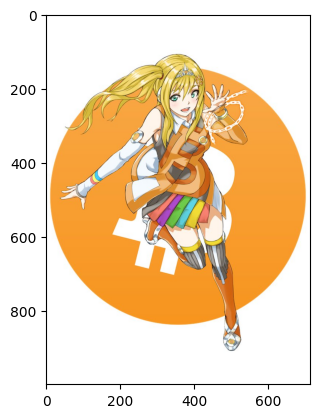

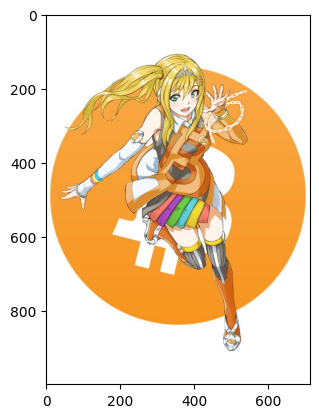

In [5]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Assuming 'tweets' is your DataFrame and 'photos' is the column with image URLs
tweets_photo = btc_tweets['photos']
for url in tweets_photo:  
    if pd.notna(url) and url != "[]":  # Check if the URL is not NaN
        url = url.replace("'", '')
        url = url.replace("[", '')
        url = url.replace("]", '')
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

## Word cloud of Bitcoin Tweet of Elon Musk

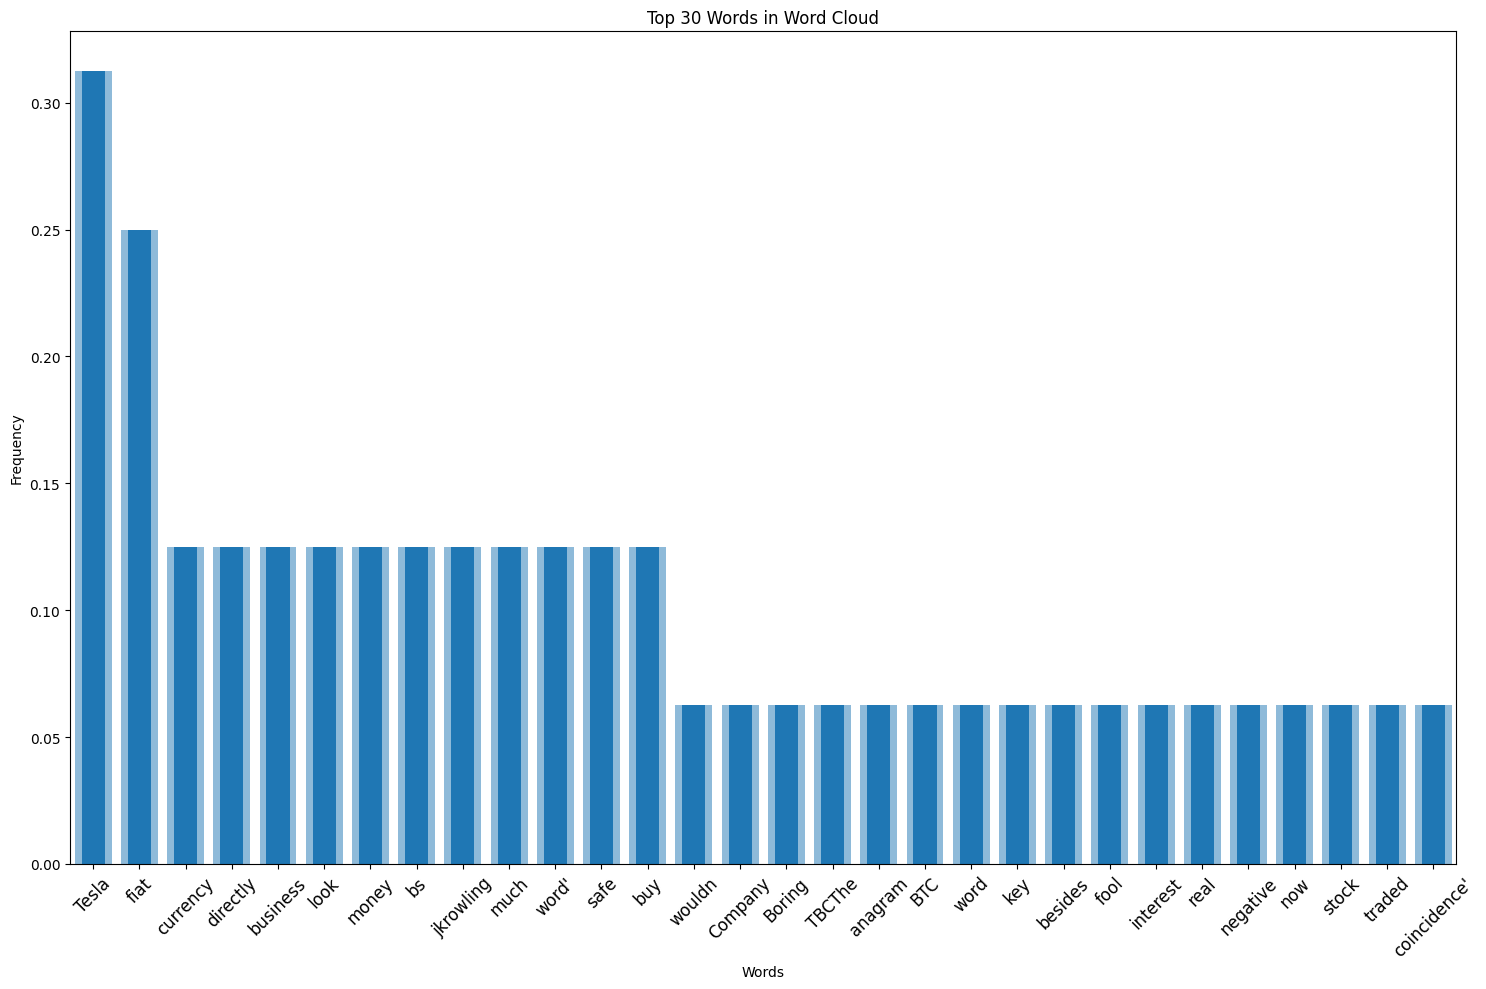

In [17]:
# word cloud for Elon Musk tweets containing Bitcoin
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = btc_tweets['tweet'].values
stopwords = set(STOPWORDS)
stopwords.add('t')
stopwords.add('s')
stopwords.add('almost')
stopwords.add('9ZbBJ5fuVq')
stopwords.add('itqRslFNcb')
stopwords.add('https')
stopwords.add('elsewhere')
stopwords.add('Bitcoin\'')
stopwords.add('BTC\'')
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black'
                       '',
    stopwords = stopwords).generate(str(text))

word_freq = wordcloud.words_

# Create the histogram
plt.figure(figsize=(15,10))

# Convert the dictionary to a pandas Series for easier plotting
word_series = pd.Series(word_freq)
word_series = word_series.drop(word_series.index[0])
word_series.sort_values(ascending=False).iloc[:30].plot(kind='bar')

plt.title('Top 30 Words in Word Cloud')
plt.xlabel('Words')
plt.ylabel('Frequency')
# make font of x-axis labels bigger
plt.xticks(fontsize=12, rotation=45)
# make each bar has wider distance
plt.tight_layout()
plt.bar(word_series.index, word_series.values, alpha=0.5)
plt.show()


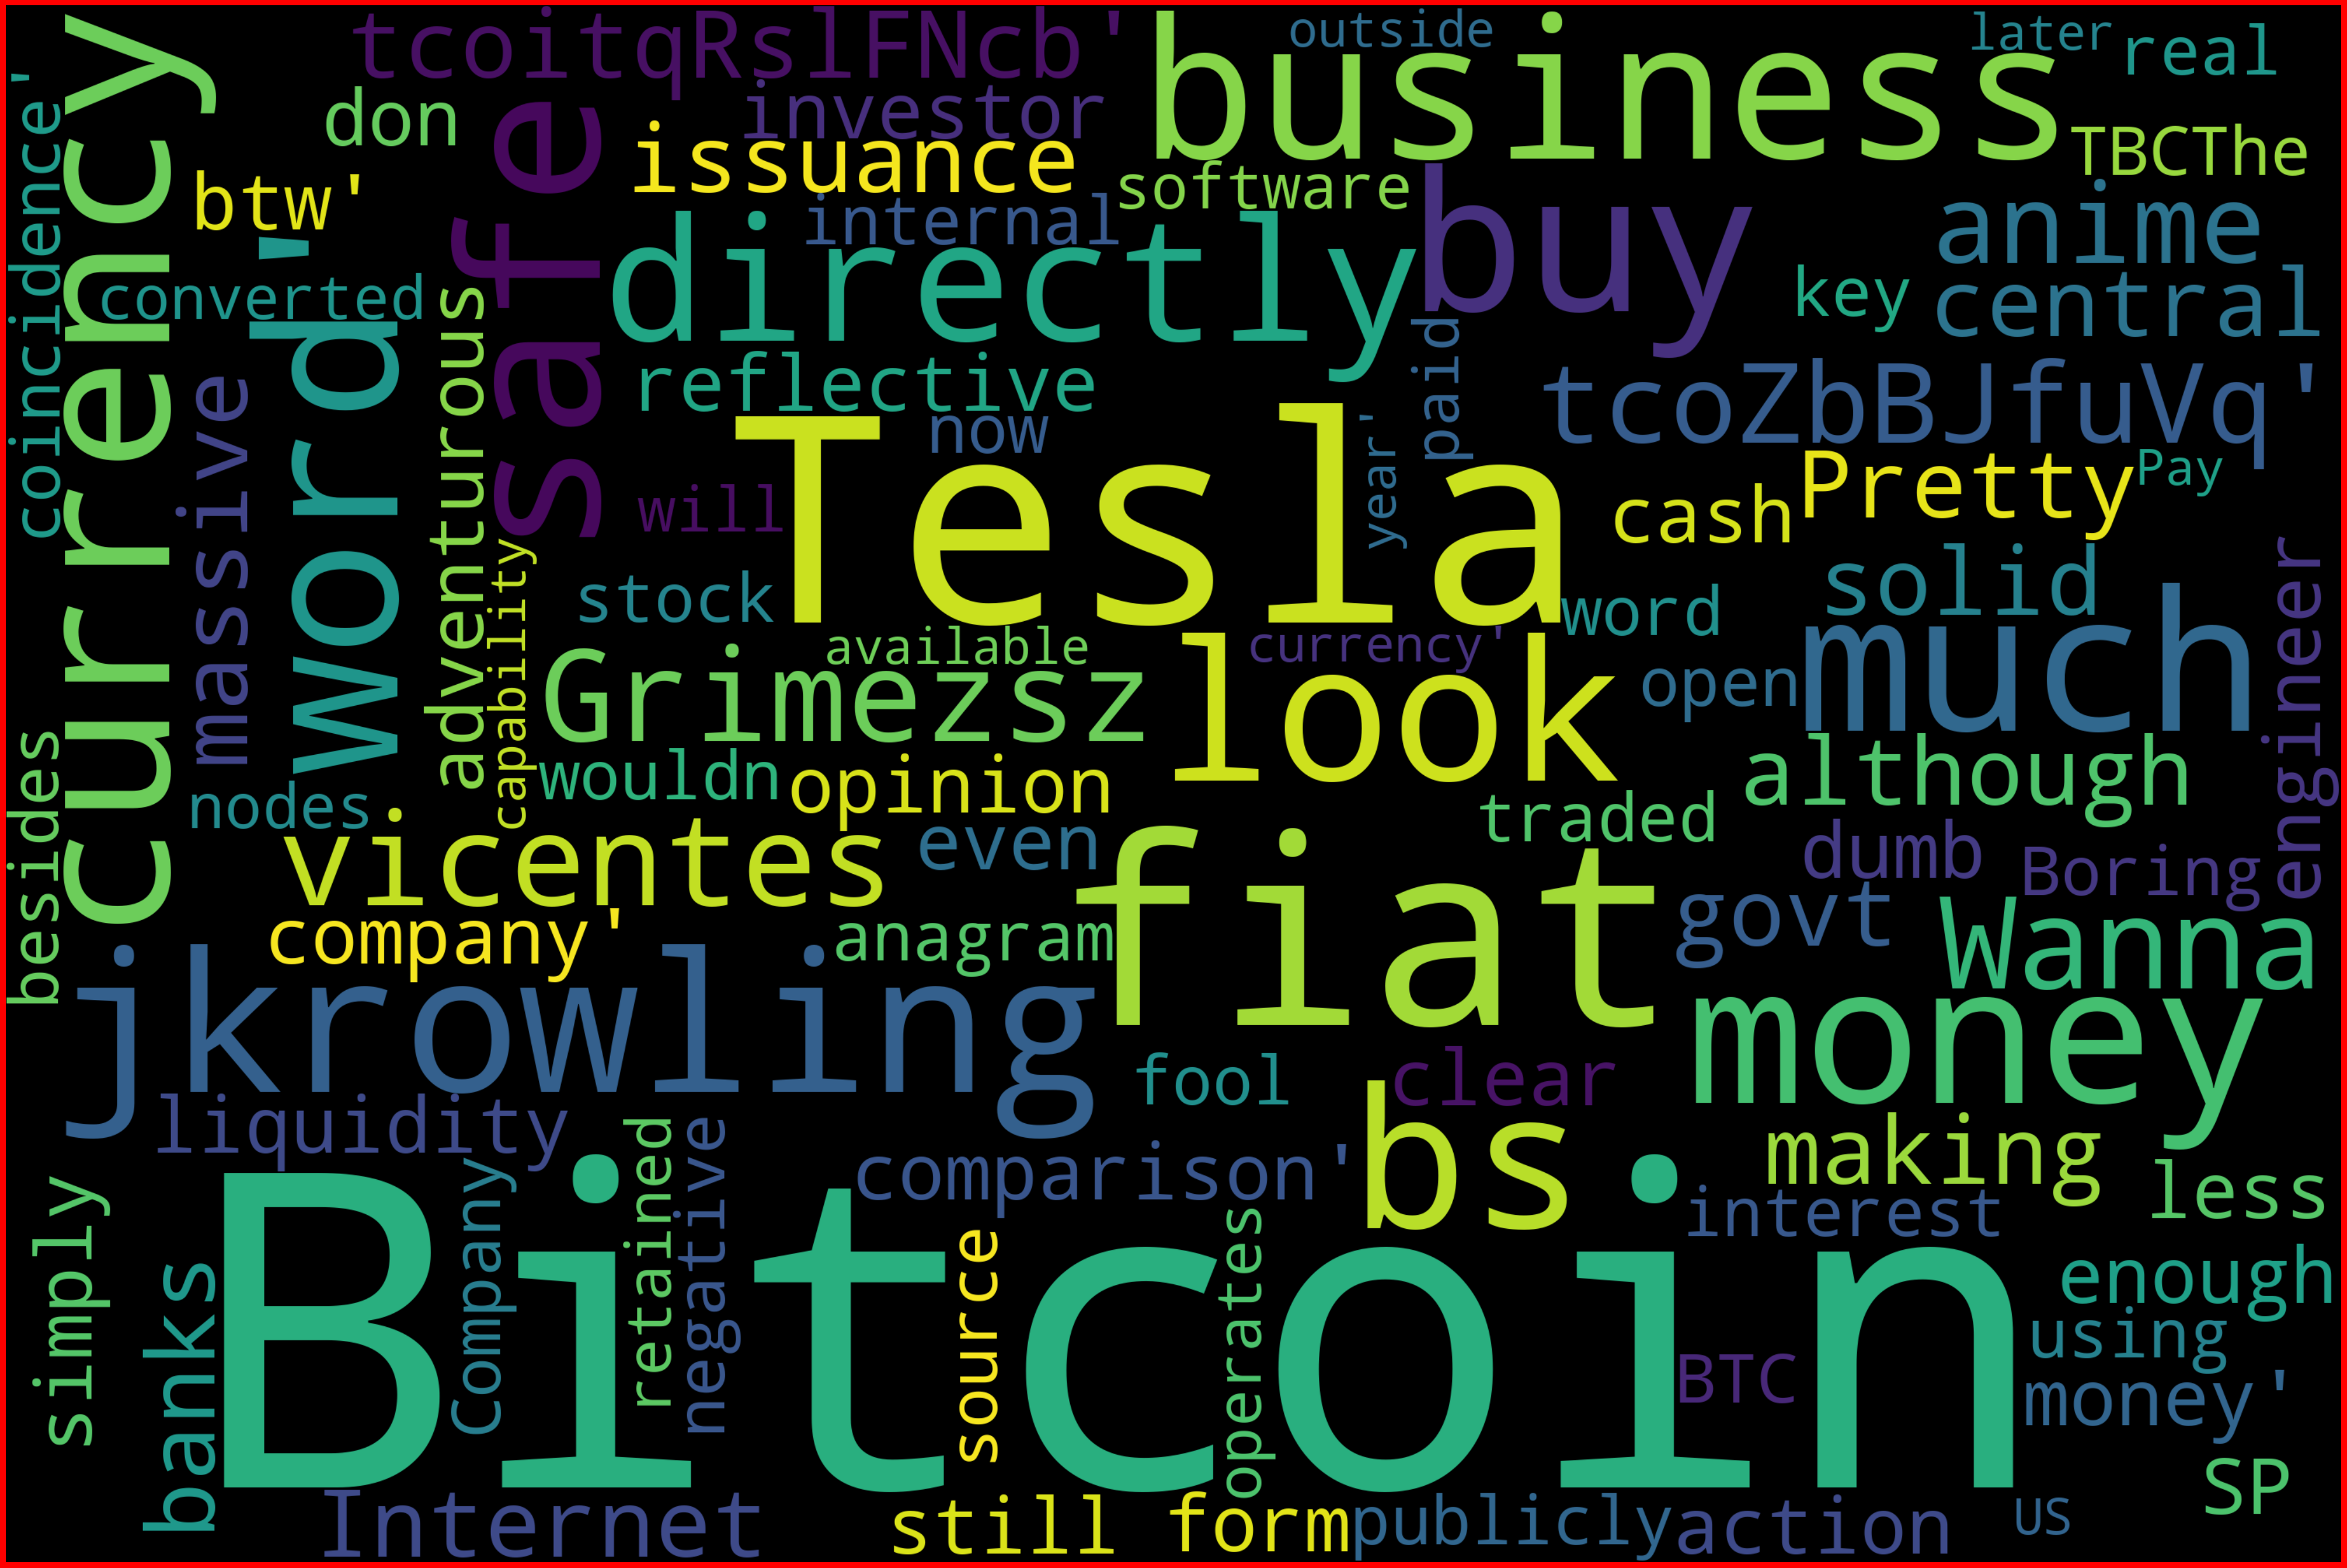

In [18]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'r',
    edgecolor = 'b')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Investigate how positive or how bad are Elon tweets in general

> The problem isn't playing with each INDIVIDUAL TWEET, it is the sequences of tweets ----

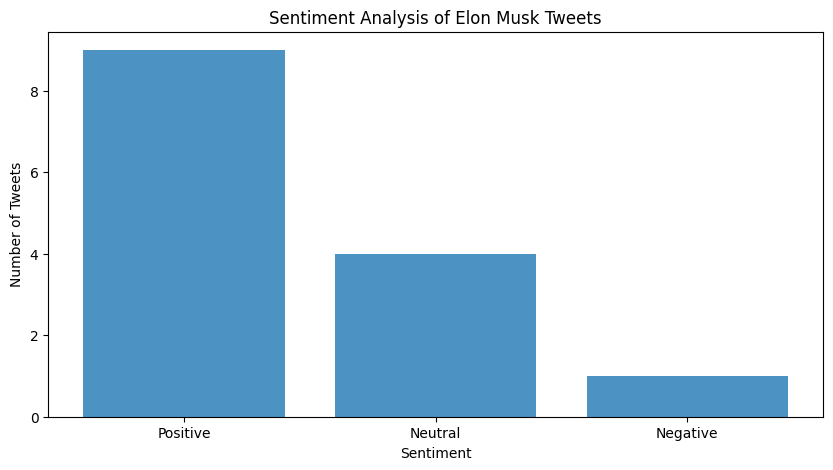

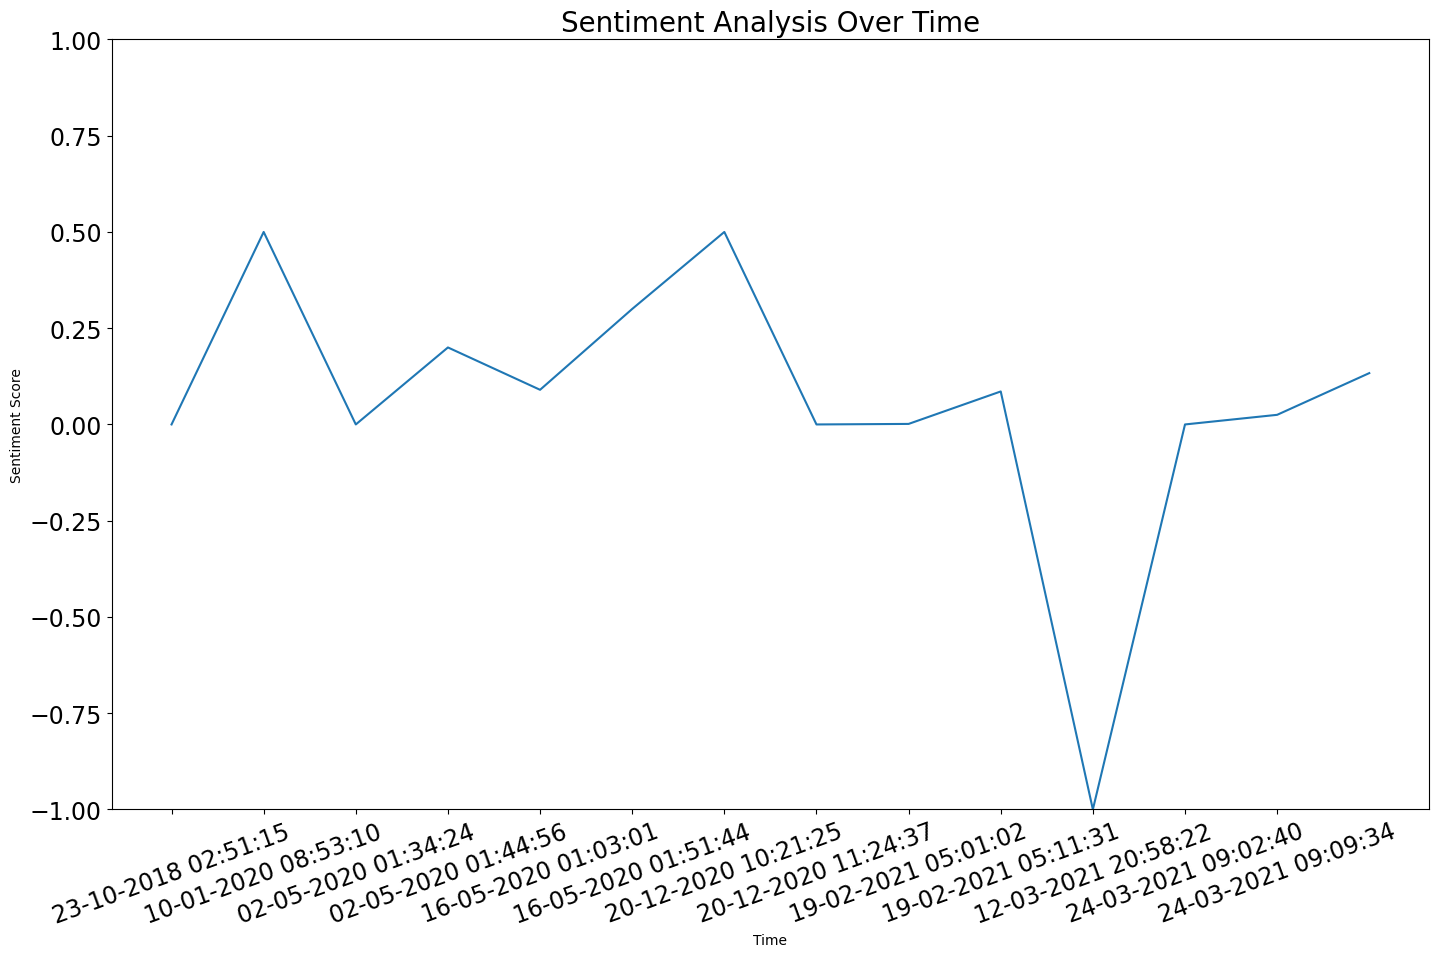

In [7]:
import numpy as np
from textblob import TextBlob
btc_tweets = btc_tweets.copy()
btc_tweets['polarity'] = btc_tweets['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
# Categorize the sentiment scores
def get_analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
btc_tweets['analysis'] = btc_tweets.loc[:, 'polarity'].apply(get_analysis)
btc_tweets.tail()
# Count the number of positive, negative, and neutral tweets
tweet_counts = btc_tweets['analysis'].value_counts()
# Plot the counts in a bar chart
plt.figure(figsize=(10,5))
plt.bar(tweet_counts.index, tweet_counts.values, alpha=0.8)
plt.title('Sentiment Analysis of Elon Musk Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# Plot the sentiment scores in a time series plot
plt.figure(figsize=(17,10))
# date ascending for plotting btc_tweets['polarity]

plt.plot(btc_tweets.date + " " + btc_tweets.time ,btc_tweets['polarity'])
plt.title('Sentiment Analysis Over Time', fontsize=20)
plt.xlabel('Time')
plt.xticks(np.arange(0, len(btc_tweets) - 1, step=1), rotation=20, fontsize=17)
plt.ylabel('Sentiment Score')
plt.yticks(fontsize=17)
plt.ylim(-1, 1)
plt.show()

## Add a line for clustering date upload Bitcoin

### Read Bitcoin By Minutes Price

In [8]:
btc_price = pd.read_csv("../dataset/Bitcoin/minutes/bitstampUSD_1-min_2012-01-01_to_2021-03-31.csv")
# btc_price['Open'] = pd.to_datetime(btc_price['Open'])
btc_prices = btc_price.sort_values("Timestamp", ascending=False).head(2000000)
btc_prices["Timestamp"]

4857376    1617148800
4857375    1617148740
4857374    1617148680
4857373    1617148620
4857372    1617148560
              ...    
2857381    1497149100
2857380    1497149040
2857379    1497148980
2857378    1497148920
2857377    1497148860
Name: Timestamp, Length: 2000000, dtype: int64

##### Extract timestamp of tweet

In [19]:
from datetime import datetime
from Visualize.utils.timestamp_converter import str_to_timestamp, round_to_nearest_minute
btc_tweets = btc_tweets.copy()
btc_tweets['timestamp'] = btc_tweets['created_at'].apply(lambda x: str_to_timestamp(x))
btc_tweets['timestamp'] = btc_tweets['timestamp'].apply(lambda x: round_to_nearest_minute(x))

timestamp = btc_tweets.pop('timestamp')
btc_tweets.insert(0, 'timestamp', timestamp)

btc_tweets.head(1)

,timestamp,created_at,date,time,tweet,photos,replies_count,retweets_count,likes_count,link,polarity,analysis
0,1540237860,2018-10-23 02:51:15 EEST,23-10-2018,02:51:15,vicentes Grimezsz Wanna buy some Bitcoin 😉😉 tc...,['https://pbs.twimg.com/media/DqJo4XUU8AAVUcl....,1070,7431,24040,https://twitter.com/elonmusk/status/1054520588...,0.0,Neutral


#### Check timestamp of tweet match with bitcoin price timestamp

In [20]:
from Visualize.utils.timestamp_converter import timestamp_to_str
timestamps = btc_tweets['timestamp']
print (timestamps.head())


0    1540237860
1    1578621180
2    1588358040
3    1588358700
4    1589565780
Name: timestamp, dtype: int64


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


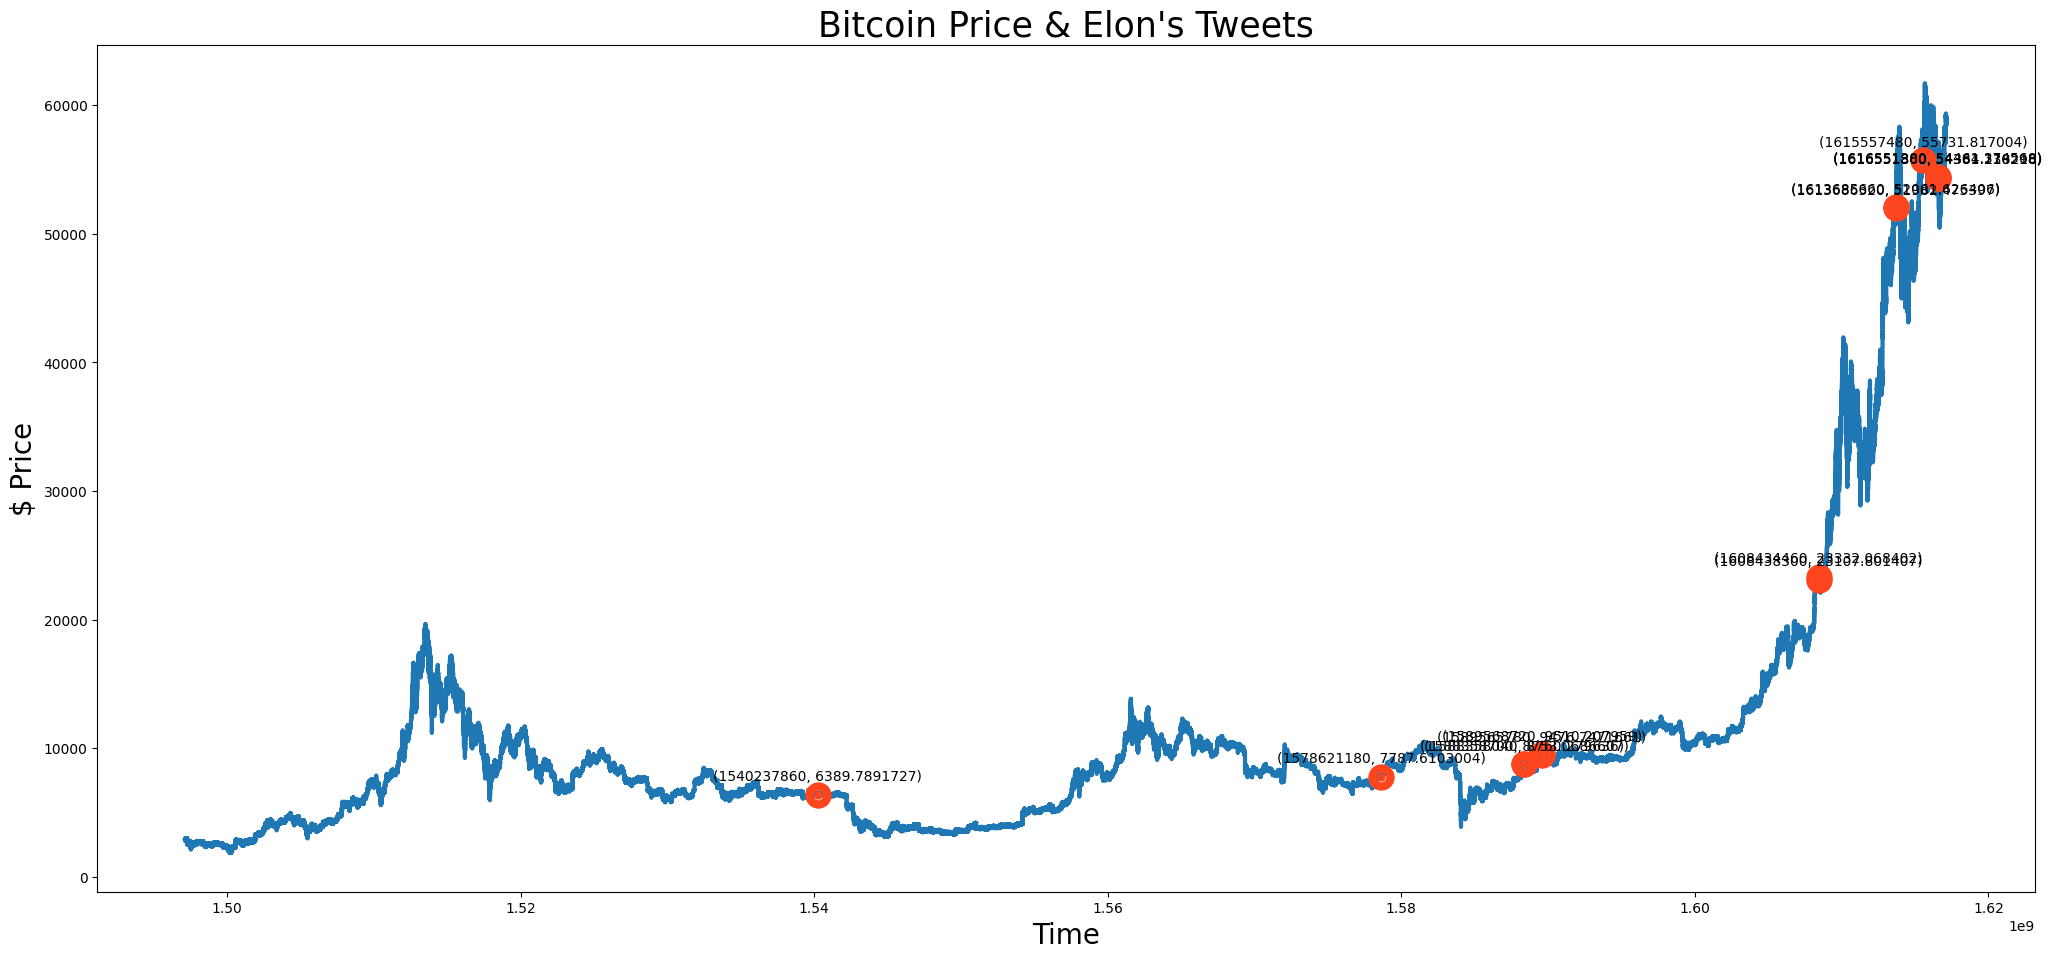

In [11]:
from Visualize.utils.timestamp_converter import timestamp_to_str
timestamps = btc_tweets['timestamp']

x_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Timestamp"].values
print (type(x_values))
y_values = btc_prices[btc_prices["Timestamp"].isin(timestamps)]["Weighted_Price"].values
print (type(y_values))

# Plot
plt.figure(figsize = (25, 11))
for x, y in zip(x_values, y_values):
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    plt.scatter(x, y, color="#FF451D", lw=13, zorder=2)
plt.plot(btc_prices["Timestamp"], btc_prices["Weighted_Price"],  lw=3, zorder=1)
plt.title("Bitcoin Price & Elon's Tweets", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20);

